<a href="https://colab.research.google.com/github/Yun-8bit/Assignment-3-Week-/blob/main/9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

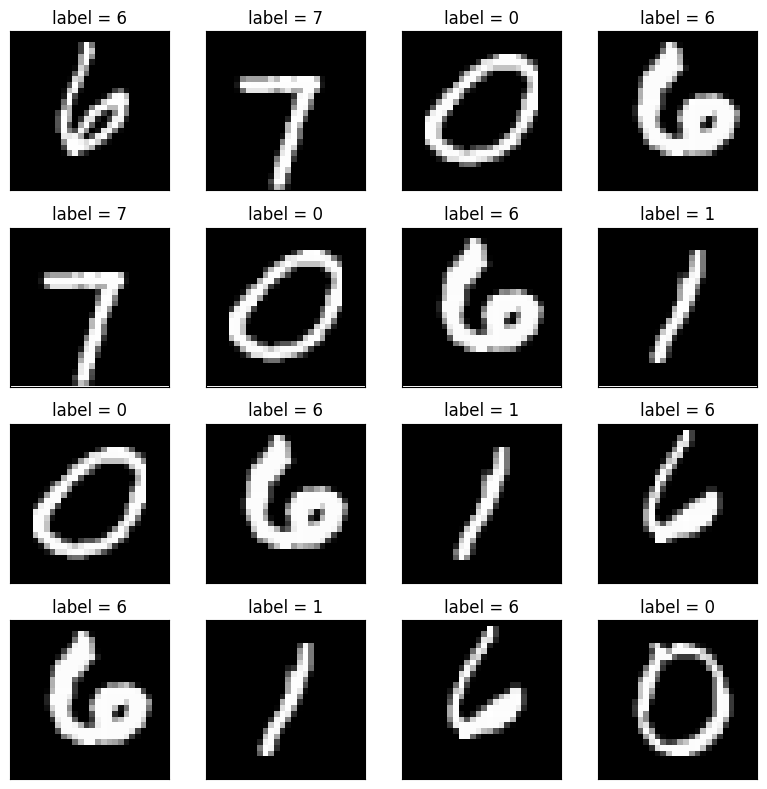

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy is 0.918
Correctly predicted images:


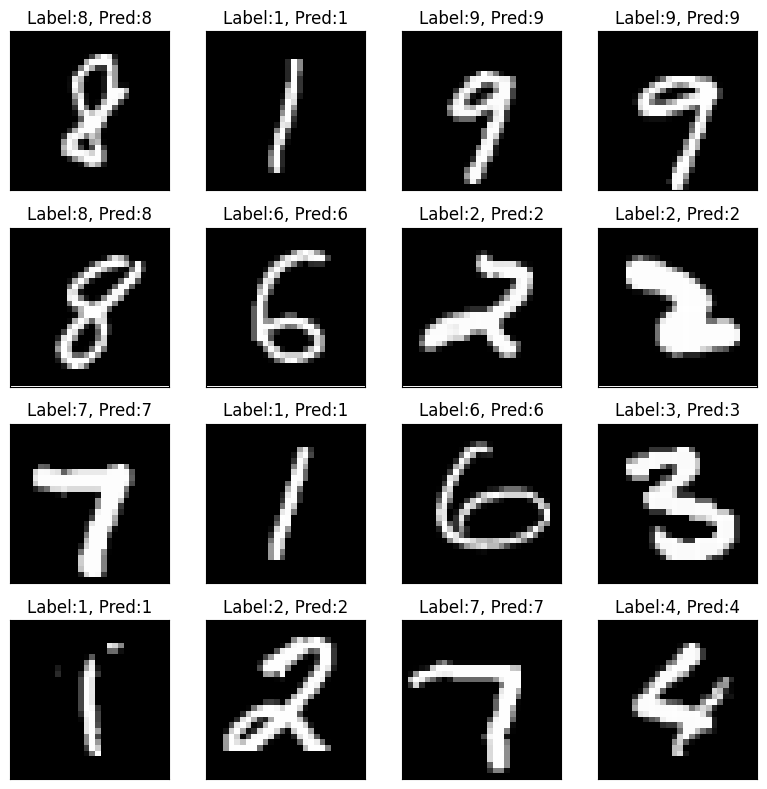

Incorrectly predicted images:


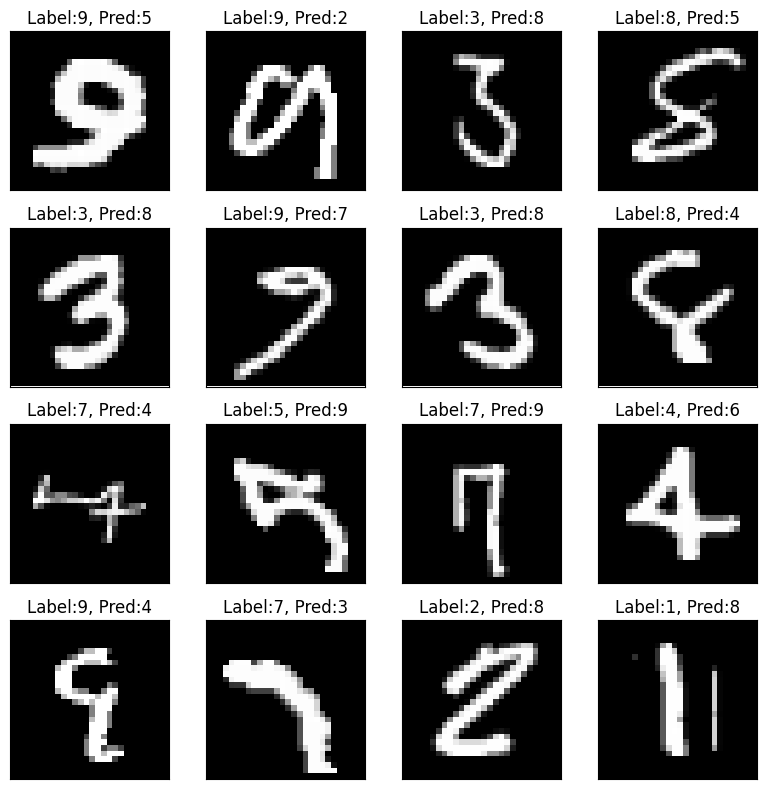

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv")

X = train_df.drop(columns=["label"])
y = train_df["label"]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j * 4
        ax[i, j].imshow(x_train.iloc[idx].values.reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"label = {y_train.iloc[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()

clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                         intercept_scaling=1, l1_ratio=None, max_iter=100,
                         multi_class='multinomial', n_jobs=None, penalty='l2',
                         random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                         warm_start=False)
clf.fit(x_train, y_train)

y_val_pred = clf.predict(x_val)

x_val = x_val.values
y_val = y_val.values

print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

print("Correctly predicted images:")
x_val_correct = x_val[y_val == y_val_pred,:]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label:{y_val_correct[idx]}, Pred:{y_val_pred_correct[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()


print("Incorrectly predicted images:")
x_val_incorrect = x_val[y_val != y_val_pred,:]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_incorrect[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label:{y_val_incorrect[idx]}, Pred:{y_val_pred_incorrect[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()

preds = clf.predict(x_test)
sample_submission['Label'] = preds
sample_submission.to_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv", index = False)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
